In [2]:
from datetime import datetime
import pandas as pd

data=pd.read_csv('employee_retention_data.csv')
data.quit_date=pd.to_datetime(data.quit_date)
data.join_date=pd.to_datetime(data.join_date)
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [3]:
data.head(20)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaT
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23
9,504159.0,1,sales,7,104000.0,2012-06-12,NaT


## Check data issues

* check the seniority. The max of seniority is 99. It is quite impossible that a single employee works in a company for 99 years. I used the cutoff 30 years. It does make sense that employees work for less than 30 years in a company. There are two outliers with 98 and 99 years of seniority. Because only a very small proportion data have this issue, lets consider it as outliers and just drop them for simplicity.

In [4]:
data[data.seniority>=30]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06


In [5]:
data=data[data.seniority<30]

## headcount table calculation

In [6]:
company_tot=data.company_id.unique()
date_tot=data.join_date.unique()
hd_tot=[]
day=[]
company=[]
for i in (date_tot):
    for j in (company_tot):
        join_hd=len(data[(data.join_date<=i) & (data.company_id==j) & ~ pd.isna(data.quit_date)])
        hd_tot.append(join_hd)
        day.append(i)
        company.append(j)


hc_data=pd.DataFrame({'day':day,'employee_headcount':hd_tot, 'company_id':company})
hc_data.head(10)

,day,employee_headcount,company_id
0,2014-03-24,633,7
1,2014-03-24,1033,4
2,2014-03-24,1990,2
3,2014-03-24,484,9
4,2014-03-24,4164,1
5,2014-03-24,650,6
6,2014-03-24,427,10
7,2014-03-24,879,5
8,2014-03-24,1367,3
9,2014-03-24,516,8


## Analysis

<AxesSubplot:xlabel='day'>

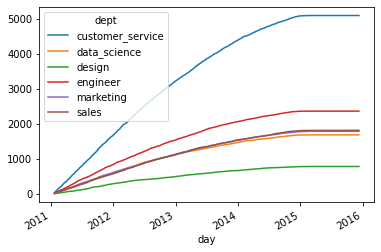

In [7]:
dept_tot=data.dept.unique()
date_tot=data.join_date.unique()
hd_tot=[]
day=[]
dept=[]
for i in (date_tot):
    for j in (dept_tot):
        join_hd=len(data[(data.join_date<=i) & (data.dept==j) & ~ pd.isna(data.quit_date)])
        hd_tot.append(join_hd)
        day.append(i)
        dept.append(j)


hc_data=pd.DataFrame({'day':day,'employee_headcount':hd_tot, 'dept':dept})
hc_data = hc_data.pivot(index='day', columns='dept', values='employee_headcount')
hc_data.plot()

<AxesSubplot:xlabel='day'>

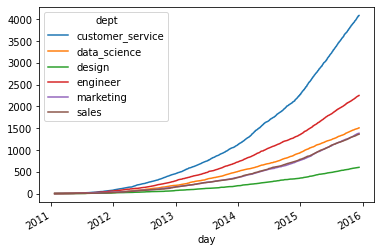

In [8]:
dept_tot=data.dept.unique()
date_tot=data.join_date.unique()
hd_tot=[]
day=[]
dept=[]
for i in (date_tot):
    for j in (dept_tot):
        join_hd=len(data[(data.join_date<=i) & (data.dept==j) & pd.isna(data.quit_date)])
        hd_tot.append(join_hd)
        day.append(i)
        dept.append(j)


hc_data=pd.DataFrame({'day':day,'employee_quit':hd_tot, 'dept':dept})
hc_data = hc_data.pivot(index='day', columns='dept', values='employee_quit')
hc_data.plot()

<AxesSubplot:xlabel='day'>

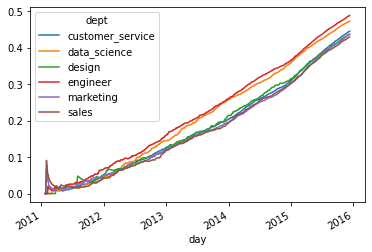

In [9]:
dept_tot=data.dept.unique()
date_tot=data.join_date.unique()
hd_tot=[]
day=[]
dept=[]
for i in (date_tot):
    for j in (dept_tot):
        join_hd=len(data[(data.join_date<=i) & (data.dept==j) & pd.isna(data.quit_date)])/(len(data[(data.join_date<=i) & (data.dept==j) & pd.isna(data.quit_date)])+len(data[(data.join_date<=i) & (data.dept==j) & ~ pd.isna(data.quit_date)]))
        hd_tot.append(join_hd)
        day.append(i)
        dept.append(j)


hc_data=pd.DataFrame({'day':day,'churn_rate':hd_tot, 'dept':dept})
hc_data = hc_data.pivot(index='day', columns='dept', values='churn_rate')
hc_data.plot()

<AxesSubplot:xlabel='company'>

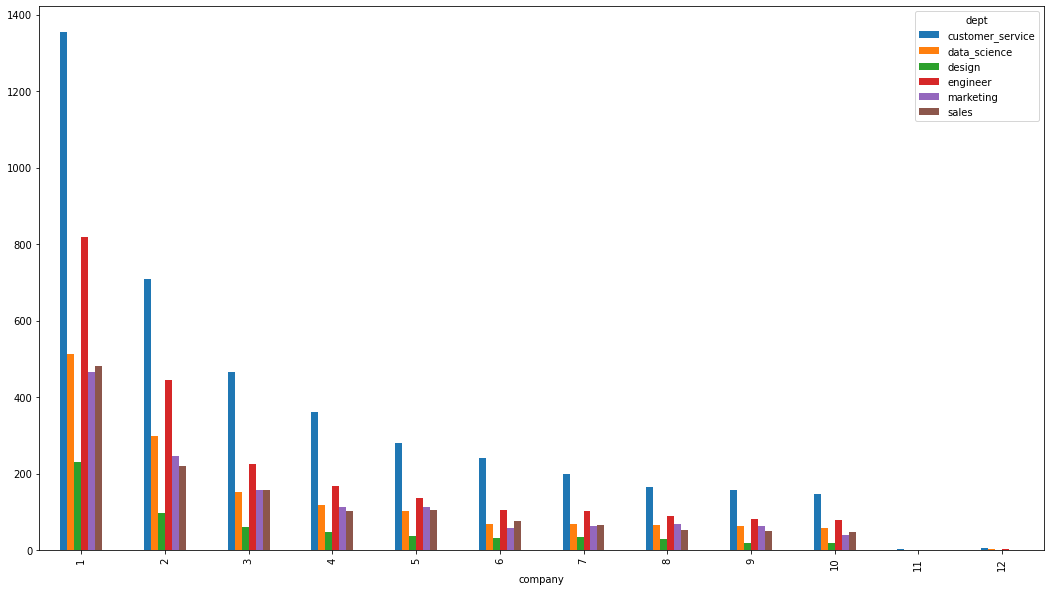

In [10]:
dept_tot=data.dept.unique()
company_tot=data.company_id.unique()
hd_tot=[]
company=[]
dept=[]
for i in (company_tot):
    for j in (dept_tot):
        if (len(data[(data.company_id==i) & (data.dept==j) & pd.isna(data.quit_date)])+len(data[(data.company_id==i) & (data.dept==j) & ~ pd.isna(data.quit_date)])) !=0:
            join_hd=len(data[(data.company_id==i) & (data.dept==j) & pd.isna(data.quit_date)])
            hd_tot.append(join_hd)
            company.append(i)
            dept.append(j)


hc_data=pd.DataFrame({'company':company,'churn_rate':hd_tot, 'dept':dept})
hc_data = hc_data.pivot(index='company', columns='dept', values='churn_rate')
hc_data.plot(kind='bar', figsize=(18,10))



<AxesSubplot:xlabel='company'>

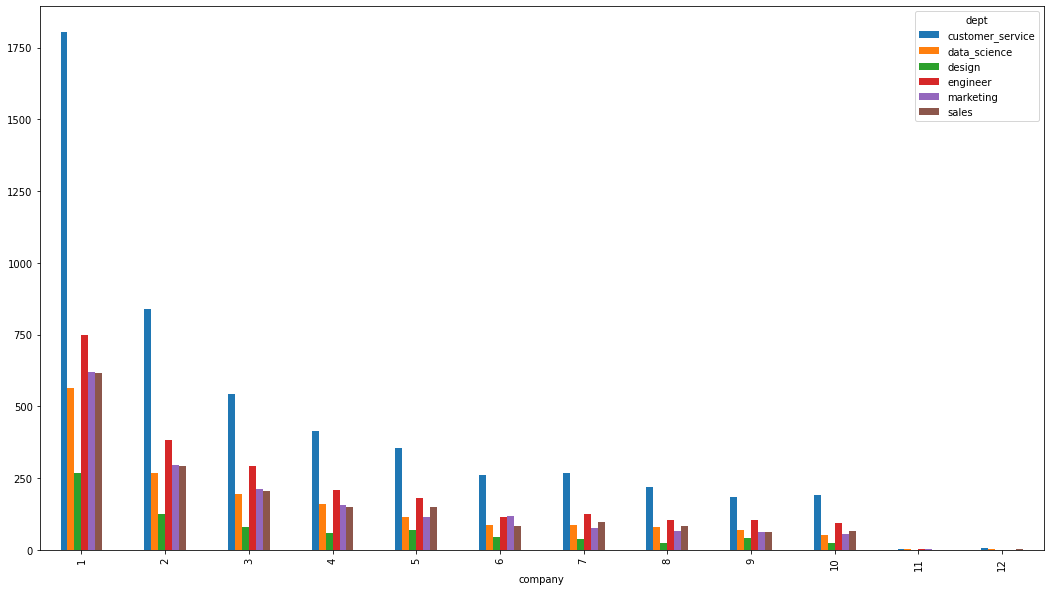

In [11]:
dept_tot=data.dept.unique()
company_tot=data.company_id.unique()
hd_tot=[]
company=[]
dept=[]
for i in (company_tot):
    for j in (dept_tot):
        if (len(data[(data.company_id==i) & (data.dept==j) & pd.isna(data.quit_date)])+len(data[(data.company_id==i) & (data.dept==j) & ~ pd.isna(data.quit_date)])) !=0:
            join_hd=len(data[(data.company_id==i) & (data.dept==j) & ~ pd.isna(data.quit_date)])
            hd_tot.append(join_hd)
            company.append(i)
            dept.append(j)


hc_data=pd.DataFrame({'company':company,'churn_rate':hd_tot, 'dept':dept})
hc_data = hc_data.pivot(index='company', columns='dept', values='churn_rate')
hc_data.plot(kind='bar', figsize=(18,10))



<AxesSubplot:xlabel='company'>

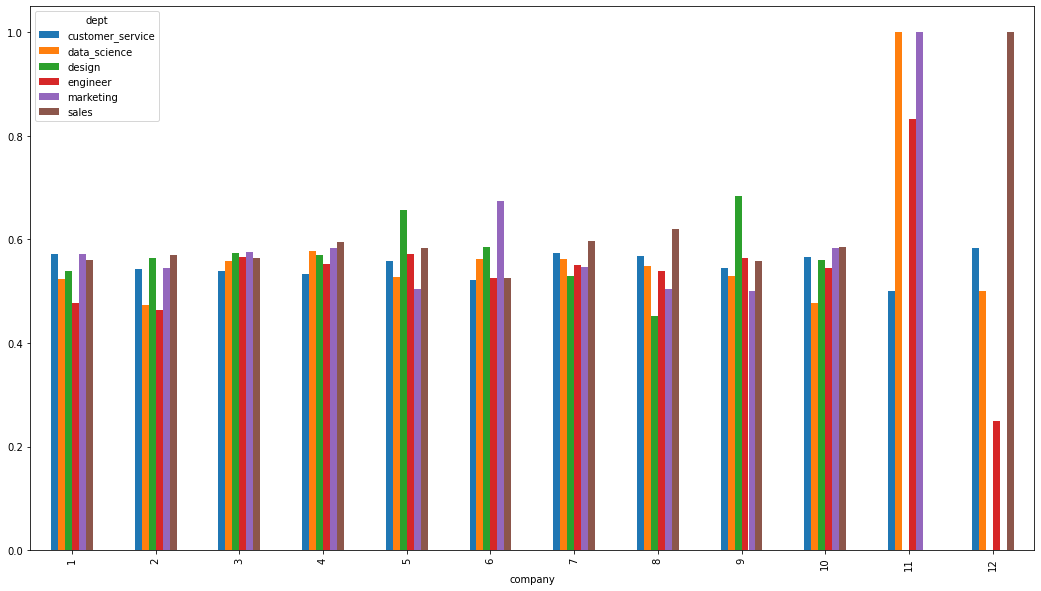

In [12]:
dept_tot=data.dept.unique()
company_tot=data.company_id.unique()
hd_tot=[]
company=[]
dept=[]
for i in (company_tot):
    for j in (dept_tot):
        if (len(data[(data.company_id==i) & (data.dept==j) & pd.isna(data.quit_date)])+len(data[(data.company_id==i) & (data.dept==j) & ~ pd.isna(data.quit_date)])) !=0:
            join_hd=len(data[(data.company_id==i) & (data.dept==j) & ~ pd.isna(data.quit_date)])/(len(data[(data.company_id==i) & (data.dept==j) & pd.isna(data.quit_date)])+len(data[(data.company_id==i) & (data.dept==j) & ~ pd.isna(data.quit_date)]))
            hd_tot.append(join_hd)
            company.append(i)
            dept.append(j)


hc_data=pd.DataFrame({'company':company,'churn_rate':hd_tot, 'dept':dept})
hc_data = hc_data.pivot(index='company', columns='dept', values='churn_rate')
hc_data.plot(kind='bar', figsize=(18,10))



<AxesSubplot:xlabel='seniority'>

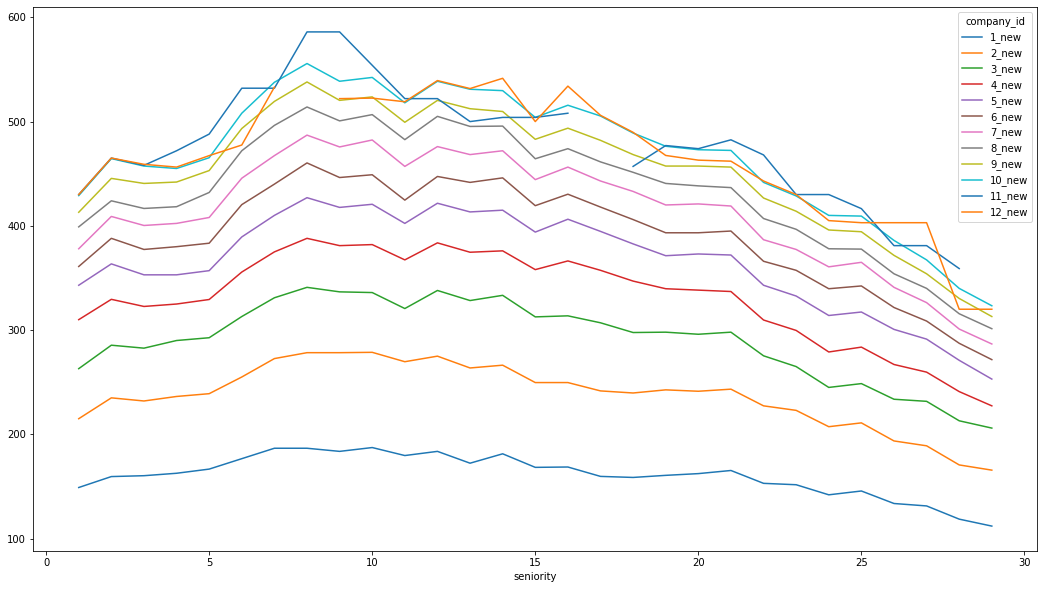

In [13]:
data['quit_ind']=[0 if pd.isna(x) else 1 for x in data.quit_date]
seniorty_dt=data.groupby(['company_id','seniority']).sum().groupby(level=1).cumsum().reset_index()
seniorty_dt=seniorty_dt[['company_id','seniority','quit_ind']]
seniorty_dt=seniorty_dt.pivot(index='seniority',columns='company_id',values='quit_ind')#.plot()
# company_tot=data.company_id.unique()
for i in seniorty_dt.columns:
    seniorty_dt[str(i)+'_new']=seniorty_dt[i].rolling(3,min_periods=1).mean()
    seniorty_dt=seniorty_dt.drop(columns=i)
seniorty_dt.plot(figsize=(18,10))

<AxesSubplot:xlabel='salary', ylabel='seniority'>

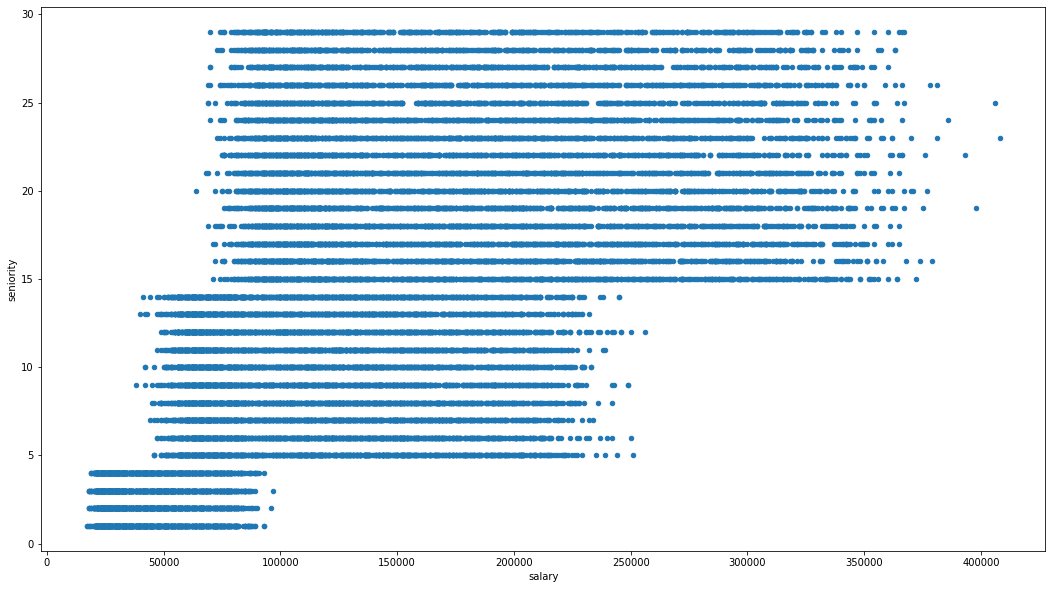

In [14]:
salary_dt=data[['seniority','salary']]
salary_dt.plot.scatter(x='salary',y='seniority', figsize=(18,10))

<AxesSubplot:xlabel='salary'>

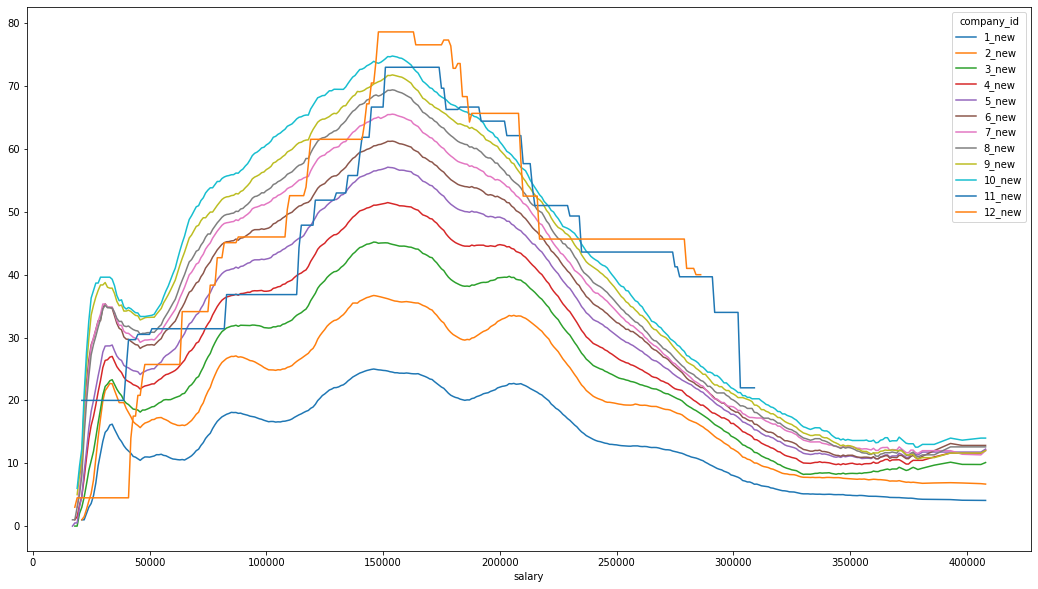

In [15]:
data['ind']=[1 for i in data.quit_ind]
salary_dt2=data.groupby(['company_id','salary']).sum()
salary_dt2['churn_rate']=salary_dt2.quit_ind/salary_dt2.ind
salary_dt2=salary_dt2.groupby(level=1).cumsum().reset_index()
salary_dt3=salary_dt2[['company_id','salary','quit_ind']]
salary_dt3=salary_dt3.pivot(index='salary',columns='company_id',values='quit_ind')#.plot()

for i in salary_dt3.columns:
    salary_dt3[str(i)+'_new']=salary_dt3[i].rolling(100,min_periods=1).mean()
    salary_dt3=salary_dt3.drop(columns=i)
salary_dt3.plot(figsize=(18,10))

<AxesSubplot:xlabel='salary'>

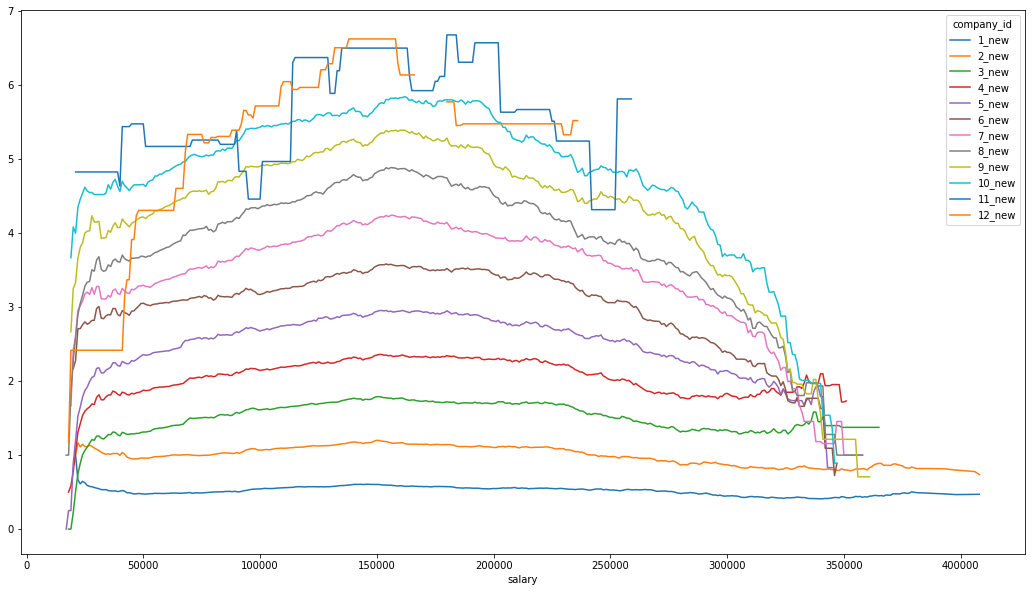

In [16]:
salary_dt4=salary_dt2[['company_id','salary','churn_rate']]
salary_dt4=salary_dt4.pivot(index='salary',columns='company_id',values='churn_rate')#.plot()

for i in salary_dt4.columns:
    salary_dt4[str(i)+'_new']=salary_dt4[i].rolling(50,min_periods=1).mean()
    salary_dt4=salary_dt4.drop(columns=i)
salary_dt4.plot(figsize=(18,10))

Churn rate is higher in the engineer and data science departments. Especially those employees in the company 11.

Customer service department has more employees; while design department has less people.

the chrun rates in different companies are also different.

People with 5-15 years of working experiences are more likely to quit their jobs, comparing with people with less than 5 yrs or more than 20 yrs of experience. And that trend is quite stable among all the 12 companies.

Senior employees always have higher salary. For people only have 5 years of working experience, their salary range is relatively small; but for more senior employees, their salary range can be at about 4 times wider than employees in the early stage.

Most of the employees who quitted also have middle ranged salary. People with high salaries are less likely to quit jobs probably because there are not many of those customers so the data is only based off a very small group of chief officer type of people.


In [17]:
from pandas.api.types import is_numeric_dtype, is_categorical_dtype
def report(data,date_var):
    date_tot=data[date_var].unique()
    
    for i in data.columns:
        if is_categorical_dtype(data[i]):
            print(i)
            # var_tot=data[i].unique()
            # hd_tot=[]
            # # qt_tot=[]
            # day=[]
            # var=[]
            # for k in (date_tot):
            #     for j in (var_tot):
            #         join_hd=len(data[(data[date_var]<=k) & (data[i]==j) & ~ pd.isna(data.quit_date)])
            #         # quit_hd=len(data[(data.date_var<=k) & (data.i==j) & pd.isna(data.quit_date)])
            #         hd_tot.append(join_hd)
            #         # qt_tot.append(quit_hd)
            #         day.append(k)
            #         var.append(j)
            # hc_data=pd.DataFrame({'day':day,'employee_headcount':hd_tot, i:var})
            # hc_data = hc_data.pivot(index='day', columns=i, values='employee_headcount')
            # hc_data.plot()

In [18]:
hc_data = hc_data.pivot(index='x', columns='color', values='y')
hc_data.plot(x='day',y='employee_headcount')

KeyError: 'x'

In [ ]:
data.head(20)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_ind,hd_ind
412,224745.0,1,customer_service,19,108000.0,2011-01-24,2012-02-24,1,1
723,130683.0,1,customer_service,20,121000.0,2011-01-24,2012-01-06,1,1
910,227626.0,1,data_science,15,244000.0,2011-01-24,2014-05-09,1,1
1593,933554.0,1,sales,28,191000.0,2011-01-24,2013-03-08,1,1
1693,418614.0,1,customer_service,9,77000.0,2011-01-24,2012-11-09,1,1
1787,543741.0,1,sales,14,137000.0,2011-01-24,2014-01-03,1,1
3525,280323.0,1,data_science,1,74000.0,2011-01-24,2012-08-31,1,1
6274,559394.0,1,data_science,17,342000.0,2011-01-24,2015-01-16,1,1
6562,745820.0,1,sales,17,218000.0,2011-01-24,2014-01-24,1,1
8155,860815.0,1,marketing,13,110000.0,2011-01-24,2013-11-15,1,1


If I can add another variable to explain the employee churn, I will choose # years in this company this department. Because most people could choose to stay in the company if they have worked there for more than 20 years or they just started a job; people who worked in a single company in a single company are more likely to move on to a new company for their career. But this is only a hypothesis. Need to be tested later.

#### Comments:

Addition to this, I should also check the quit_dt-hire_dt. That is the employment length and that always tell a story.

Also a machine learning model can help explaining the employee churn.

In [94]:
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_ind,ind,employment_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,1,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,1,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0,1,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,1,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1,1040 days
...,...,...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,1,1,1151 days
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,1,1,372 days
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,0,1,NaT
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,0,1,NaT


In [64]:
data['employment_length']=data.quit_date-data.join_date
days=data[~pd.isna(data.employment_length)].employment_length.dt.days#.value_counts().hist(bins=100,grid=False)

(array([  1.,   0.,   1.,   1.,   2.,   0.,   2.,   2.,   3.,   3.,   2.,
          1.,   2.,   4.,   2.,   4.,   4.,   7.,  21.,  26.,  27.,  56.,
         61., 110., 162., 309., 282., 300., 387., 461., 540., 879., 507.,
        536., 506., 443., 418., 474., 233., 164., 118., 107.,  62.,  66.,
         21.,  11.,   5.,   6.,   1.,   8.,  11.,   3.,   7.,  14.,  12.,
         20.,  20.,  14.,  33.,  30.,  44.,  51.,  86.,  52.,  63.,  76.,
         83.,  98., 150.,  94.,  99.,  98., 126., 137., 155., 196., 127.,
        144., 144., 132., 124., 189., 114., 104., 105., 107.,  81., 105.,
         71.,  63.,  55.,  57.,  51.,  62.,  21.,  20.,  25.,  21.,  21.,
         26.,  49.,  19.,  25.,  35.,  22.,  39.,  40.,  37.,  28.,  25.,
         22.,  35.,  61.,  36.,  47.,  35.,  48.,  38.,  66.,  40.,  32.,
         43.,  39.,  43.,  42.,  57.,  47.,  41.,  54.,  33.,  40.,  54.,
         32.,  38.,  29.,  32.,  40.,  36.,  21.,  26.,  27.,  24.,  17.,
         38.,  14.,  20.,  24.,  21., 

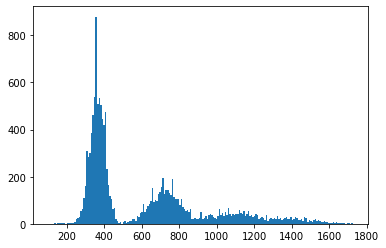

In [70]:
import matplotlib.pyplot as plt
plt.hist(days,bins=200)

In [74]:
data.quit_date.dt.month

0        10.0
1         4.0
2         NaN
3         6.0
4         8.0
         ... 
24695     6.0
24696     2.0
24697     NaN
24698     NaN
24699    10.0
Name: quit_date, Length: 24700, dtype: float64

(array([1208.,  930., 1060., 1066., 1278., 1067., 1119., 1234., 1047.,
        1317., 1296.,  886.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

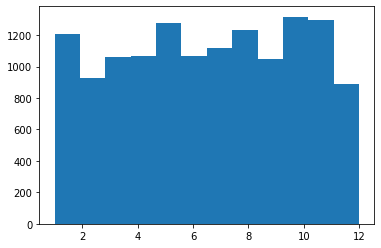

In [82]:
plt.hist(data.quit_date.dt.month,bins=12)

### Tree Model

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn import dummy

In [191]:
x=data.iloc[:,2:5]
data['end_dt']=data.quit_date.fillna(pd.to_datetime('2015-12-13'))
# x['employment_length']=(data.end_dt-data.join_date).dt.days
x=pd.get_dummies(x)
y=data.quit_ind.astype(str)
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [193]:
tree=DecisionTreeClassifier(max_depth=10)
tree=tree.fit(x_train,y_train)


In [195]:
y_pred=tree.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.5518218623481781

In [196]:
y_pred_train=tree.predict(x_train)
metrics.accuracy_score(y_train,y_pred_train)

0.5995951417004048

In [197]:

var_importance={'var':x.columns.tolist(),'value':tree.feature_importances_.tolist()}
var_importance=pd.DataFrame(var_importance)
var_importance

,var,value
0,seniority,0.219626
1,salary,0.681621
2,dept_customer_service,0.006156
3,dept_data_science,0.034764
4,dept_design,0.007011
5,dept_engineer,0.030709
6,dept_marketing,0.009913
7,dept_sales,0.010199


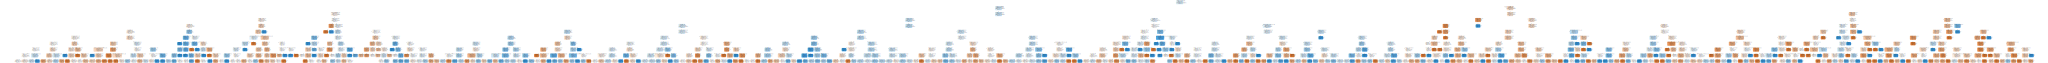

In [198]:
from sklearn.tree import export_graphviz 
import graphviz

dot_data=export_graphviz(tree, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = graphviz.Source(dot_data)  
# graph.write_png('diabetes.png')
graph

Use cv...

In [202]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.565080971659919 {'max_depth': 3}


In order to include the join date in the model, you need to convert the datetime to a categorical variable like following..

In [210]:
data['Year'] = data['join_date'].apply(lambda time: time.year)
data['Month'] = data['join_date'].apply(lambda time: time.month)
data['Day'] = data['join_date'].apply(lambda time: time.day)
x=data[['dept','seniority','salary','Year','Month','Day']]
x=pd.get_dummies(x)
y=data[['quit_ind']].astype(str)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
parameters={'max_depth':range(3,20)}
clf=GridSearchCV(DecisionTreeClassifier(),parameters,n_jobs=4)
clf.fit(X=x_train,y=y_train)
tree_model=clf.best_estimator_

y_pred=tree_model.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8002699055330634

In [212]:
y_pred_train=tree_model.predict(x_train)
metrics.accuracy_score(y_train,y_pred_train)

0.7973395026026605

In [216]:
var_importance=pd.DataFrame({'var':x.columns.tolist(),'value':tree_model.feature_importances_.tolist()})
var_importance.sort_values(by=['value'],ascending=False)

,var,value
2,Year,0.948556
1,salary,0.026952
3,Month,0.020231
0,seniority,0.003054
4,Day,0.000870
10,dept_sales,0.000308
9,dept_marketing,0.000028
5,dept_customer_service,0.000000
6,dept_data_science,0.000000
7,dept_design,0.000000


This is the most accurate model after trying the decision model and the cross validation decision model; with or without the join date and the employment length. I finally decided to remove the employment length because that contains the quit date info and that appears to be the most relavent variable. Even after I remove it, the join date info is still the most important variable in this model.

Salary and the seniority is really important. That makes sense because people who have low or high salary are less likely to change jobs but people in the middle are more likely to change jobs.

Department info is also important but not as important as salary and seniority.